# import 使用到的套件

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input, GaussianNoise,Lambda
import matplotlib.pyplot as plt

Using TensorFlow backend.


# 宣告一般 Function
## 1.get_mnist() : 取得mnist資料庫圖片
## 2.plot_result(x,y,c,cmap='RdYlBu'):  畫出降維後的圖片

In [2]:
def get_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

# data pre-processing
    x_train = x_train.astype('float32') / 255. - 0.5       # minmax_normalized
    x_test = x_test.astype('float32') / 255. - 0.5         # minmax_normalized
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))
    
    return  x_train,x_test,y_train, y_test

def plot_result(x,y,c,cmap='RdYlBu'):    
    plt.scatter(x,y,c=c,cmap=cmap)
    plt.colorbar()
    plt.show()

# 宣告Model及用在Model上的function
## 1. get_model(source,target): 取得AE model
## 2. train_model(model,source,target,epochs=100, batch=1000):訓練AE model

In [3]:
def get_model(source,target,encoding_dim=2):
    input_img = Input(shape=(784,))
    # encoder layers
    encoded = Dense(512, activation='relu')(input_img)
    encoded = Dense(256, activation='relu')(encoded)
    encoded = Dense(128, activation='relu')(encoded)
    encoded = Dense(64, activation='relu')(encoded)
    decoded = Dense(32, activation='relu')(encoded)
    decoded = Dense(16, activation='relu')(encoded)
    encoded = Dense(10, activation='relu')(encoded)
    encoder_output = Dense(encoding_dim,activation='linear')(encoded)
    
    # decoder layers
    decoded = Dense(10, activation='relu')(encoder_output)
    decoded = Dense(16, activation='relu')(decoded)
    decoded = Dense(32, activation='relu')(decoded)
    decoded = Dense(64, activation='relu')(decoded)
    decoded = Dense(128, activation='relu')(decoded)
    decoded = Dense(256, activation='relu')(decoded)
    decoded = Dense(512, activation='relu')(decoded)
    decoded = Dense(784, activation='linear')(decoded)
    
    autoencoder = Model(inputs=input_img, outputs=decoded)
    encoder = Model(inputs=input_img, outputs=encoder_output)
    autoencoder.compile(optimizer='adam', loss='mse')
    
    return autoencoder,encoder

def train_model(model,source,target,epochs=100, batch=1000):
        hist = model.fit(source,target,epochs=epochs,batch_size=batch,shuffle=True)
        return model,hist
    


# Main Function

Epoch 1/20
  512/60000 [..............................] - ETA: 6096s - loss: 0.2301 

c:\users\eason\appdata\local\programs\python\python36\lib\site-packages\keras\callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120131). Check your callbacks.
  % delta_t_median)


60000/60000 [==============================] - 61s - loss: 0.0690    
Epoch 2/20
60000/60000 [==============================] - 2s - loss: 0.0566     
Epoch 3/20
60000/60000 [==============================] - 2s - loss: 0.0519     
Epoch 4/20
60000/60000 [==============================] - 2s - loss: 0.0476     
Epoch 5/20
60000/60000 [==============================] - 2s - loss: 0.0457     
Epoch 6/20
60000/60000 [==============================] - 1s - loss: 0.0449     
Epoch 7/20
60000/60000 [==============================] - 2s - loss: 0.0447     
Epoch 8/20
60000/60000 [==============================] - 1s - loss: 0.0428     
Epoch 9/20
60000/60000 [==============================] - 1s - loss: 0.0420     
Epoch 10/20
60000/60000 [==============================] - 2s - loss: 0.0410     
Epoch 11/20
60000/60000 [==============================] - 1s - loss: 0.0406     
Epoch 12/20
60000/60000 [==============================] - 2s - loss: 0.0402     
Epoch 13/20
60000/60000 [===========

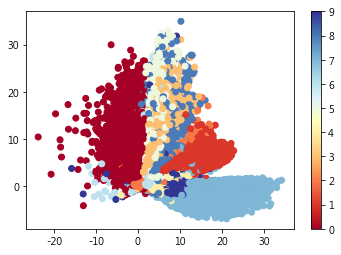

In [4]:
EPOCHS = 20
BATCH_SIZE = 256
ENCODING_DIM = 2   # in order to plot in a 2D figure

x_train,x_test,y_train, y_test = get_mnist()
autoencoder, encoder =  get_model(x_train,x_train,encoding_dim=2)
autoencoder,hist = train_model(autoencoder,x_train,x_train,epochs=EPOCHS, batch=BATCH_SIZE)
encoded_imgs = encoder.predict(x_train,batch_size=10000)
plot_result(encoded_imgs[:, 0],encoded_imgs[:, 1],y_train,cmap='RdYlBu')    